In [ ]:
!pip install langdetect

     |████████████████████████████████| 981 kB 5.4 MB/s 
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993242 sha256=e403d1c601392736e2dc2692a6ba72aea9cb51e029e3149cf23e464dd240ae07
  Stored in directory: /root/.cache/pip/wheels/c5/96/8a/f90c59ed25d75e50a8c10a1b1c2d4c402e4dacfa87f3aff36a
Successfully built langdetect


In [ ]:
import numpy as np
import pandas as pd
import os
import json
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import re
import string
SEED = 42
import random 
random.seed(SEED)
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.stem import PorterStemmer
from nltk.tokenize import TweetTokenizer,word_tokenize

from langdetect import detect,detect_langs
%matplotlib inline

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df=pd.read_csv('/content/drive/MyDrive/reviewSelected100.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15300 entries, 0 to 15299
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   review_id    15300 non-null  object 
 1   user_id      15300 non-null  object 
 2   business_id  15300 non-null  object 
 3   stars        15300 non-null  float64
 4   useful       15300 non-null  int64  
 5   funny        15300 non-null  int64  
 6   cool         15300 non-null  int64  
 7   text         15300 non-null  object 
 8   date         15300 non-null  object 
dtypes: float64(1), int64(3), object(5)
memory usage: 1.1+ MB


Not a bad little pub. Had the sliders, salt and pepper wings, and mushroom burger -- forgettable, but good. The fries are what I will remember, and come back for.

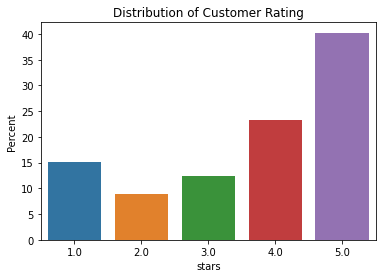

In [ ]:
ax = sns.barplot(data=df, x='stars', y='stars', estimator=lambda x: len(x) / len(df) * 100)
ax.set(ylabel="Percent")
plt.title('Distribution of Customer Rating')
plt.show()

In [ ]:
print('Total Businesss: %d'%len(df['business_id'].unique()))
print('Total Reviews: %d'%len(df[['text']]))
print('Total Labels: %d'%len(df[['stars']]))

Total Businesss: 153
Total Reviews: 15300
Total Labels: 15300


data_df.loc[data_df['stars'] == 3, 'sentiment'] = 'neutral' 
data_df.loc[data_df['stars'] < 3, 'sentiment'] = 'negative' 
data_df.loc[data_df['stars'] > 3, 'sentiment'] = 'positive'

In [ ]:
data_df=df[['business_id','text','stars']]

data_df=data_df.reset_index(drop=True)
data_df.head()

,business_id,text,stars
0,ZBE-H_aUlicix_9vUGQPIQ,We had my Mother's Birthday Party here on 10/2...,5.0
1,e-YnECeZNt8ngm0tu4X9mQ,Good Korean grill near Eaton Centre. The marin...,4.0
2,j7HO1YeMQGYo3KibMXZ5vg,Was recommended to try this place by few peopl...,5.0
3,7e3PZzUpG5FYOTGt3O3ePA,Ambience: Would not expect something this nice...,3.0
4,vuHzLZ7nAeT-EiecOkS5Og,Absolutely the WORST pool company that I have ...,1.0


## Data Cleaning

In [ ]:
# Check and exclude reviews that are invalid
textdf = data_df['text']
                                                
for i in range(len(data_df)):                                         
    try:                                                          
        lang=detect(textdf[i])                                      
    except:                                                                                                     
        print("This review throws error:", textdf[i])     
        data_df=data_df.drop(i, axis=0)         
data_df=data_df.reset_index(drop=True)


This review throws error: ...
This review throws error: ??????????????????????????????????????????????????????????????????10??????????????????????????????????????????????????????????????????????????????????????
This review throws error: ???????????????????????????????????????????????????????????????????????????


In [ ]:
# Check langauge of reviews
language = [detect_langs(i) for i in data_df.text]
languages = [str(i[0]).split(':')[0] for i in language]
data_df['language'] = languages
data_df['language'].value_counts()

en    15246
fr       32
es        8
tr        4
de        3
ro        1
af        1
cy        1
nl        1
Name: language, dtype: int64

In [ ]:
data_df[data_df['language']!='en'].reset_index(drop=True)

,business_id,text,stars,language
0,e-YnECeZNt8ngm0tu4X9mQ,"À notre arrivé à Toronto, nous cherchions un r...",3.0,fr
1,k99YNCx5KcQPR7oeTgAOzg,Immer wieder gut. Die Steaks sind immer so wie...,5.0,de
2,a4GRh1TlOVhPD401mSPLZg,el peor y nada profesional que vi en mis 64 añ...,1.0,es
3,pJnN5PxqFPGZW2pJWkQtzA,grand opening!,5.0,af
4,AEx2SYEUJmTxVVB18LlCwA,On y va pour la nostalgie. Je prends toujours ...,4.0,fr
5,AEx2SYEUJmTxVVB18LlCwA,J'ai pas tant aimé le Spécial : c'est juste de...,3.0,fr
6,AEx2SYEUJmTxVVB18LlCwA,5 piasses pour un sandwich magique. Il est tel...,5.0,fr
7,AEx2SYEUJmTxVVB18LlCwA,J'avoue n'avoir jamais compris cet intérêt aut...,1.0,fr
8,AEx2SYEUJmTxVVB18LlCwA,Si cute ! Si charmant ! \n\nLe décor ancestral...,4.0,fr
9,AEx2SYEUJmTxVVB18LlCwA,"Pour un excellent sandwich salami et Bologne, ...",4.0,fr


Comment: 

Although 'grand opening!' looks like an English review, yet it does not give any information hence it is suitable to remove it. 'Great AYCE sushi lunch' may looks like an English review but it is written in Indo-European.

In [ ]:
cleaned_df=data_df[data_df['language']=='en']
cleaned_df=cleaned_df.drop(columns=['language']).reset_index(drop=True)
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15246 entries, 0 to 15245
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   business_id  15246 non-null  object 
 1   text         15246 non-null  object 
 2   stars        15246 non-null  float64
dtypes: float64(1), object(2)
memory usage: 357.5+ KB


# Section 2.1

In [ ]:
def clean_text(review):
    
    stopwords_english = stopwords.words('english')
    
    # remove float prices
    review = re.sub(r'\$[0-9.]+', '', review)
    # remove stock market tickers if the businesses is LISTED
    review = re.sub(r'\$\w*', '', review)
    # remove remaining numbers like dates, scores
    review = re.sub(r'[0-9/]*', '', review)
    # remove hyperlinks
    review = re.sub(r'https?:\/\/.*[\r\n]*', '', review)
    # remove ...
    review = re.sub(r'[.]', '', review)
    # remove hashtags
    # only removing the hash # sign from the word
    review = re.sub(r'#', '', review)

    # tokenize review
    tokenizer = TweetTokenizer(preserve_case=False, strip_handles=True,
                               reduce_len=True)
    review_tokens = tokenizer.tokenize(review)

    review_clean = []
    for word in review_tokens:
        if (word not in stopwords_english and  # remove stopwords
            word not in string.punctuation):  # remove punctuation
            review_clean.append(word)

    return review_clean

In [ ]:
# Same as clean but add a stem function
def stem_text(review):
    stemmer = PorterStemmer()
    stopwords_english = stopwords.words('english')

    # remove float prices
    review = re.sub(r'\$[0-9.]+', '', review)
    # remove stock market tickers if the businesses is LISTED
    review = re.sub(r'\$\w*', '', review)
    # remove remaining numbers like dates, scores
    review = re.sub(r'[0-9/]*', '', review)
    # remove hyperlinks
    review = re.sub(r'https?:\/\/.*[\r\n]*', '', review)
    # remove ...
    review = re.sub(r'[.]', '', review)
    # remove hashtags
    # only removing the hash # sign from the word
    review = re.sub(r'#', '', review)

    # tokenize review
    tokenizer = TweetTokenizer(preserve_case=False, strip_handles=True,
                               reduce_len=True)
    review_tokens = tokenizer.tokenize(review)

    review_clean = []
    for word in review_tokens:
        if (word not in stopwords_english and  # remove stopwords
            word not in string.punctuation):  # remove punctuation
            stem_word = stemmer.stem(word)  # stemming word
            review_clean.append(stem_word)
    return review_clean

In [ ]:

def count_cleaned_words(result, reviews):
    for review in reviews:
        for word in clean_text(review):
            # if the key exists in the dictionary, increment the count
            if word in result:
                result[word] += 1

            # else, if the key is new, add it to the dictionary and set the count to 1
            else:
                result[word] = 1
    return result

In [ ]:

def count_stemmed_words(result, reviews):
    for review in reviews:
        for word in stem_text(review):
            # if the key exists in the dictionary, increment the count
            if word in result:
                result[word] += 1

            # else, if the key is new, add it to the dictionary and set the count to 1
            else:
                result[word] = 1
    return result

In [ ]:
# Filter dictionary
def sort_dict_by_value(d, reverse = False):
  return dict(sorted(d.items(), key = lambda x: x[1], reverse = reverse))

def filter_dict_by_value(d,n):
  return dict(sorted(d.items(), key = lambda x: x[1], reverse = True)[:n+1])



In [ ]:
def plot_dict(d1,d2,line=False,title='b1'):
  if line:
    fig,ax=plt.subplots(1,2,figsize=(16,9),sharey=True)
    d1keys = list(d1.keys())
    d1vals = [d1[k] for k in d1keys]
    sns.lineplot(x=d1keys, y=d1vals,color='blue',ax=ax[0])
    
    d2keys = list(d2.keys())
    d2vals = [d2[k] for k in d2keys]
    sns.lineplot(x=d2keys, y=d2vals,color='blue',ax=ax[1])

    ax[0].set_ylabel("Stemmed Words")
    ax[1].set_ylabel("Frequency")
    ax[0].set_title('Words',fontsize=14)
    ax[1].set_title('Stemmed Words',fontsize=14)
    ax[0].set_xticklabels(d1keys,rotation=90)
    ax[1].set_xticklabels(d2keys,rotation=90)
    plt.suptitle(title,fontsize=16,y=0.93)
    plt.show()
  else:
    fig,ax=plt.subplots(1,2,figsize=(16,9),sharex=True)
    d1keys = list(d1.keys())
    d1vals = [d1[k] for k in d1keys]
    sns.barplot(x=d1vals, y=d1keys,color='blue',ax=ax[0])
    
    d2keys = list(d2.keys())
    d2vals = [d2[k] for k in d2keys]
    sns.barplot(x=d2vals, y=d2keys,color='blue',ax=ax[1])
    
    ax[0].set(ylabel="Stemmed Words")
    ax[1].set(ylabel="Stemmed Words")
    ax[0].set_title('Words',fontsize=14)
    ax[1].set_title('Stemmed Words',fontsize=14)
    #ax[0].set_xticklabels(d1vals,rotation=90)
    #ax[1].set_xticklabels(d2keys,rotation=90)
    plt.suptitle(title,fontsize=16,y=0.93)
    plt.show()

In [ ]:
business_list=list(cleaned_df.business_id.unique())
b1_selected_business=random.choice(business_list)
b1_selected_business_df=cleaned_df[cleaned_df['business_id']==b1_selected_business]
b1_reviews = b1_selected_business_df['text'].to_list()
b1_business_result=count_cleaned_words({}, b1_reviews)
b1_stem_business_result=count_stemmed_words({}, b1_reviews)

In [ ]:
business_list=list(cleaned_df.business_id.unique())
b2_selected_business=random.choice(business_list)
b2_selected_business_df=cleaned_df[cleaned_df['business_id']==b2_selected_business]
b2_reviews = b2_selected_business_df['text'].to_list()
b2_business_result=count_cleaned_words({}, b2_reviews)
b2_stem_business_result=count_stemmed_words({}, b2_reviews)

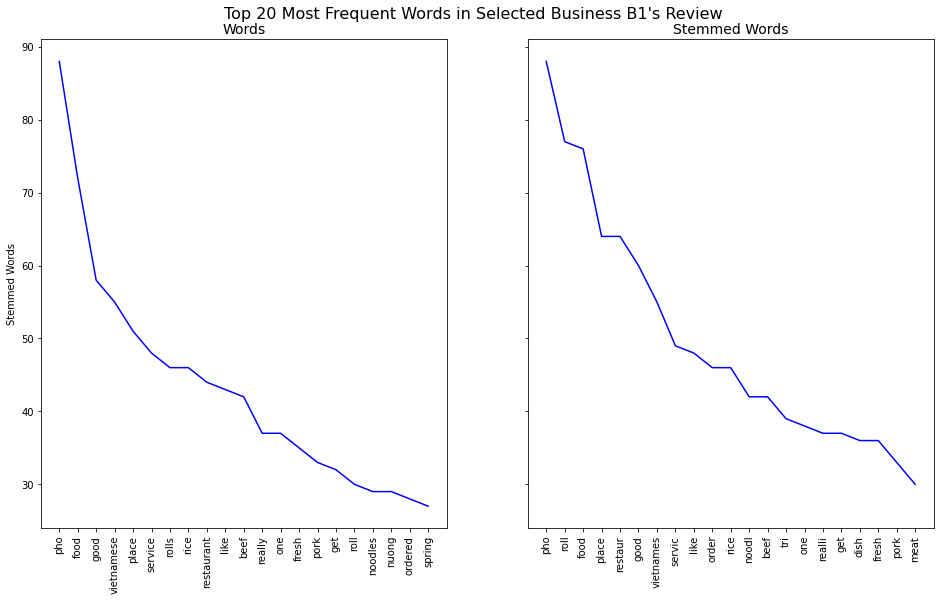

In [ ]:
b1_filtered_business_result=filter_dict_by_value(b1_business_result,20)
b1_filtered_stem_business_result=filter_dict_by_value(b1_stem_business_result,20)
plot_dict(b1_filtered_business_result,b1_filtered_stem_business_result,line=True,title="Top 20 Most Frequent Words in Selected Business B1's Review")

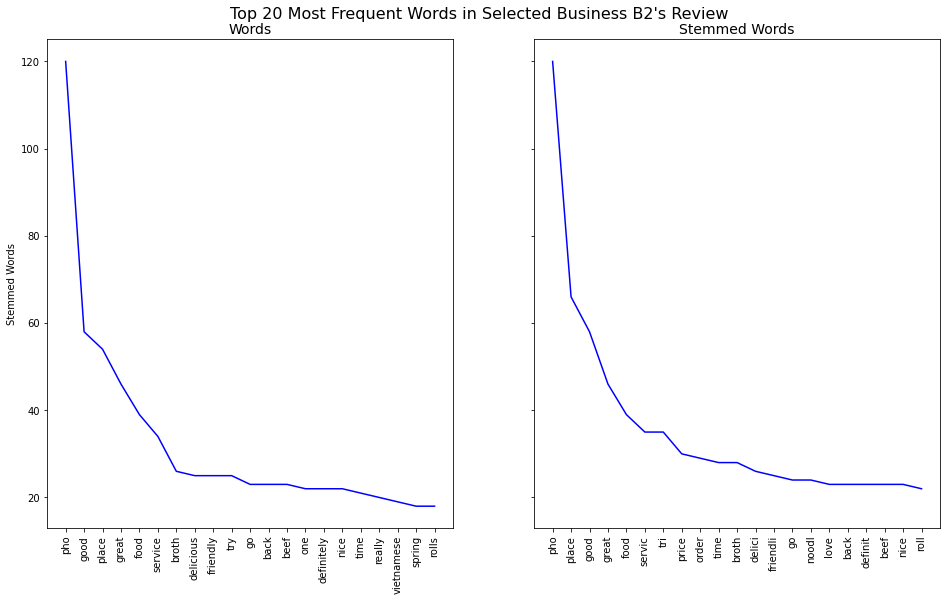

In [ ]:
b2_filtered_business_result=filter_dict_by_value(b2_business_result,20)
b2_filtered_stem_business_result=filter_dict_by_value(b2_stem_business_result,20)
plot_dict(b2_filtered_business_result,b2_filtered_stem_business_result,line=True,title="Top 20 Most Frequent Words in Selected Business B2's Review")

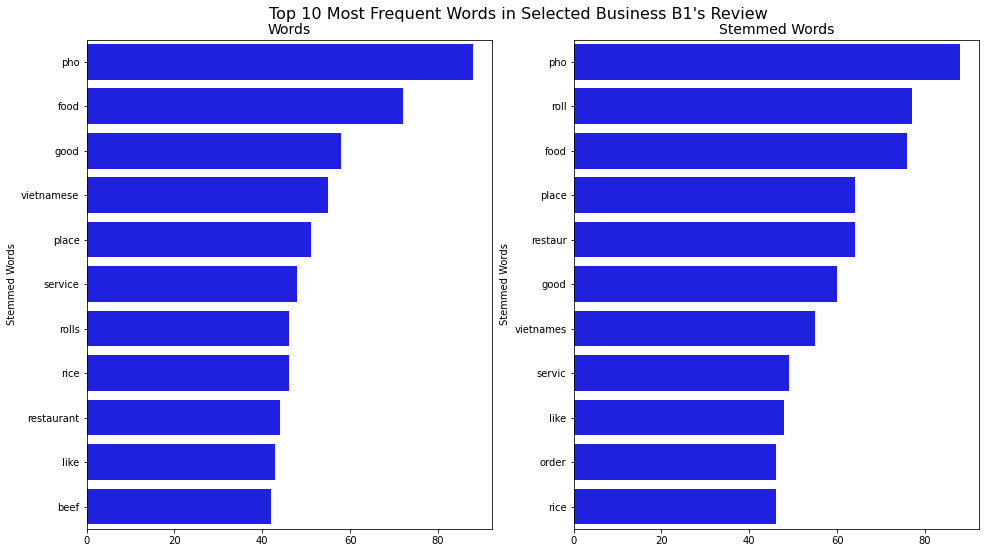

In [ ]:
b1_filtered_business_result=filter_dict_by_value(b1_business_result,10)
b1_filtered_stem_business_result=filter_dict_by_value(b1_stem_business_result,10)
plot_dict(b1_filtered_business_result,b1_filtered_stem_business_result,line=False,title="Top 10 Most Frequent Words in Selected Business B1's Review")

In [ ]:
list(b1_filtered_business_result.keys())

['pho',
 'food',
 'good',
 'vietnamese',
 'place',
 'service',
 'rolls',
 'rice',
 'restaurant',
 'like',
 'beef']

In [ ]:
list(b1_filtered_stem_business_result.keys())

['pho',
 'roll',
 'food',
 'place',
 'restaur',
 'good',
 'vietnames',
 'servic',
 'like',
 'order',
 'rice']

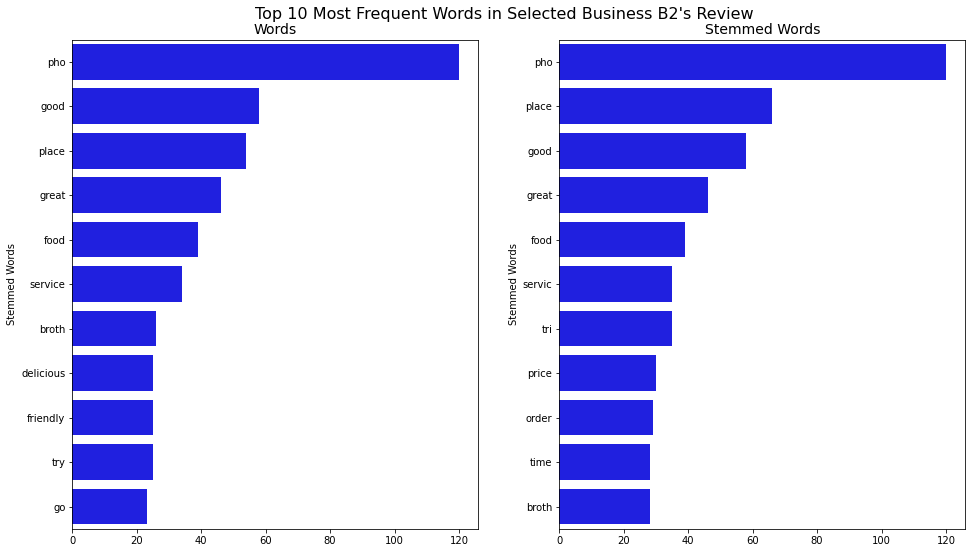

In [ ]:
b2_filtered_business_result=filter_dict_by_value(b2_business_result,10)
b2_filtered_stem_business_result=filter_dict_by_value(b2_stem_business_result,10)
plot_dict(b2_filtered_business_result,b2_filtered_stem_business_result,line=False,title="Top 10 Most Frequent Words in Selected Business B2's Review")

In [ ]:
list(b2_filtered_business_result.keys())

['pho',
 'good',
 'place',
 'great',
 'food',
 'service',
 'broth',
 'delicious',
 'friendly',
 'try',
 'go']

In [ ]:
list(b2_filtered_stem_business_result.keys())

['pho',
 'place',
 'good',
 'great',
 'food',
 'servic',
 'tri',
 'price',
 'order',
 'time',
 'broth']

# Section 4

In [ ]:
data_df=cleaned_df.copy()
data_df=data_df[data_df['stars']!=3]
# Set positive for review with 4 or 5 stars, remove review with 3 stars as neutral
data_df['sentiment']=np.where(data_df['stars']>=4, 1, 0)

In [ ]:
data_df['sentiment'].value_counts()

1    9680
0    3671
Name: sentiment, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split

x = data_df['text'].to_list()
y = np.array(data_df['sentiment'].to_list())

train_x,test_x,train_y,test_y = train_test_split( x, y, test_size=0.33, random_state=42)

print('train_x:',len(train_x),'   train_y:', len(train_y)) 
print('test_x:',len(test_x),'   test_x:' ,len(test_y))

train_x: 8945    train_y: 8945
test_x: 4406    test_x: 4406


In [ ]:
# Same as clean but add a stem function
def stem_text(review):
    stemmer = PorterStemmer()
    stopwords_english = stopwords.words('english')

    # remove float prices
    review = re.sub(r'\$[0-9.]+', '', review)
    # remove stock market tickers if the businesses is LISTED
    review = re.sub(r'\$\w*', '', review)
    # remove remaining numbers like dates, scores
    review = re.sub(r'[0-9/]*', '', review)
    # remove hyperlinks
    review = re.sub(r'https?:\/\/.*[\r\n]*', '', review)
    # remove ...
    review = re.sub(r'[.]', '', review)
    # remove hashtags
    # only removing the hash # sign from the word
    review = re.sub(r'#', '', review)
    
    # tokenize review
    tokenizer = TweetTokenizer(preserve_case=False, strip_handles=True,
                               reduce_len=True)
    review_tokens = tokenizer.tokenize(review)
    #review_tokens =word_tokenize(review)
    review_clean = []
    for word in review_tokens:
        if (word not in stopwords_english and  # remove stopwords
            word not in string.punctuation):  # remove punctuation
            # tweets_clean.append(word)
            stem_word = stemmer.stem(word)  # stemming word
            review_clean.append(stem_word)
    return review_clean

In [ ]:
# Add tokens with label to dictionary
def count_label_reviews(result, reviews,ys):
    for y,review in zip(ys,reviews):
        for word in stem_text(review):
            pair = (word,y)
            # if the key exists in the dictionary, increment the count
            if pair in result:
                result[pair] += 1
            # else, if the key is new, add it to the dictionary and set the count to 1
            else:
                result[pair] = 1
    return result

In [ ]:
# Build Frequency Dictionary
freqs=count_label_reviews({}, train_x, train_y)

In [ ]:
def lookup(freqs, word, label):
    n = 0  # freqs.get((word, label), 0)
    pair = (word, label)
    if (pair in freqs):
        n = freqs[pair]
    return n


def train_naive_bayes(freqs, train_x, train_y):
    loglikelihood = {}
    logprior = 0
    # calculate V, the number of unique words in the vocabulary
    vocab = set([pair[0] for pair in freqs.keys()])
    V = len(vocab)
    # calculate N_pos and N_neg
    N_pos = N_neg = 0
    for pair in freqs.keys():
        # if the label is positive (greater than zero)
        if pair[1] > 0:
            # Increment the number of positive words by the count for this (word, label) pair
            N_pos += freqs[pair]
        # else, the label is negative
        else:
            # increment the number of negative words by the count for this (word,label) pair
            N_neg += freqs[pair]
    # Calculate D, the number of documents
    D = len(train_y)
    # Calculate D_pos, the number of positive documents 
    D_pos = (len(list(filter(lambda x: x > 0, train_y))))
    D_pos = np.count_nonzero(train_y > 0)
    
    # Calculate D_neg, the number of negative documents 
    D_neg = (len(list(filter(lambda x: x <= 0, train_y))))
    
    # Calculate logprior
    logprior = np.log(D_pos) - np.log(D_neg)
    # For each word in the vocabulary...
    for word in vocab:
        # get the positive and negative frequency of the word
        freq_pos = lookup(freqs,word,1)
        freq_neg = lookup(freqs,word,0)

        # calculate the probability that each word is positive, and negative
        p_w_pos = (freq_pos + 1) / (N_pos + V)
        p_w_neg = (freq_neg + 1) / (N_neg + V)
        # calculate the log likelihood of the word
        loglikelihood[word] = np.log(p_w_pos/p_w_neg)
    return logprior, loglikelihood


In [ ]:
logprior, loglikelihood = train_naive_bayes(freqs, train_x, train_y)
print(logprior)
print(len(loglikelihood))

0.9947076561838033
18375


In [ ]:
loglikelihood['pho']

0.5425677563016441

In [ ]:

def naive_bayes_predict(review, logprior, loglikelihood):
    # process the tweet to get a list of words
    word_l = stem_text(review)
    # initialize probability to zero
    p = 0
    # add the logprior
    p += logprior
    for word in word_l:
        # check if the word exists in the loglikelihood dictionary
        if word in loglikelihood:
            # add the log likelihood of that word to the probability
            p += loglikelihood[word]

    return p

In [ ]:

review = """Not a bad little pub. Had the sliders, salt and pepper wings, and mushroom burger -- forgettable, but good. The fries are what I will remember, and come back for."""
p = naive_bayes_predict(review, logprior, loglikelihood)
print('The expected output is', p)

The expected output is 2.394832631795011


In [ ]:
# Test out lexicon accuracy
def test_naive_bayes(test_x, test_y, logprior, loglikelihood):
    accuracy = 0  # return this properly
    y_hats = []
    for tweet in test_x:
        # if the prediction is > 0
        if naive_bayes_predict(tweet, logprior, loglikelihood) > 0:
            # the predicted class is 1
            y_hat_i = 1
        else:
            # otherwise the predicted class is 0
            y_hat_i = 0
        # append the predicted class to the list y_hats
        y_hats.append(y_hat_i)
    # error is the average of the absolute values of the differences between y_hats and test_y
    error = np.mean(np.absolute(y_hats-test_y))
    # Accuracy is 1 minus the error
    accuracy = 1-error

    return accuracy

In [ ]:
print("Naive Bayes accuracy = %0.4f" %
      (test_naive_bayes(test_x, test_y, logprior, loglikelihood)))

Naive Bayes accuracy = 0.9001


In [ ]:
example_reviews=['I am happy with the food', 
                 'Manager attitude is bad', 
                 'this dessert is good', 
                 'the food is not bad', 
                 'the food is acceptable'
                 ]

for review in example_reviews:
    p = naive_bayes_predict(review, logprior, loglikelihood)
    print(f'{review} -> {p:.2f}')

I am happy with the food -> 2.40
Manager attitude is bad -> -3.64
this dessert is good -> 2.39
the food is not bad -> 0.01
the food is acceptable -> 0.18


In [ ]:

def get_ratio(freqs, word):
  
    pos_neg_ratio = {'positive': 0, 'negative': 0, 'ratio': 0.0}
    
    # use lookup() to find positive counts for the word (denoted by the integer 1)
    pos_neg_ratio['positive'] =lookup(freqs,word,1)

    # use lookup() to find negative counts for the word (denoted by integer 0)
    pos_neg_ratio['negative'] = lookup(freqs,word,0)

    # calculate the ratio of positive to negative counts for the word
    pos_neg_ratio['ratio'] = (pos_neg_ratio['positive'] + 1)/(pos_neg_ratio['negative'] + 1)
    
    return pos_neg_ratio


In [ ]:
get_ratio(freqs, 'satisfi')

{'negative': 27, 'positive': 119, 'ratio': 4.285714285714286}

In [ ]:
get_ratio(freqs, 'none')

{'negative': 36, 'positive': 51, 'ratio': 1.4054054054054055}

In [ ]:
get_ratio(freqs, 'never')

{'negative': 803, 'positive': 643, 'ratio': 0.8009950248756219}

In [ ]:

def get_words_by_threshold(freqs, label, threshold):
    
    word_list = {}

    for key in freqs.keys():
        word, _ = key

        # get the positive/negative ratio for a word
        pos_neg_ratio = get_ratio(freqs, word)

        # if the label is 1 and the ratio is greater than or equal to the threshold...
        if label == 1 and pos_neg_ratio['ratio'] >= threshold:

            # Add the pos_neg_ratio to the dictionary
            word_list[word] = pos_neg_ratio

        # If the label is 0 and the pos_neg_ratio is less than or equal to the threshold...
        elif label == 0 and pos_neg_ratio['ratio'] <= threshold:

            # Add the pos_neg_ratio to the dictionary
            word_list[word] = pos_neg_ratio

        # otherwise, do not include this word in the list (do nothing)
    return word_list

In [ ]:
get_words_by_threshold(freqs, label=0, threshold=0.05)

{'disrespect': {'negative': 24, 'positive': 0, 'ratio': 0.04},
 'rebeccah': {'negative': 23, 'positive': 0, 'ratio': 0.041666666666666664},
 'refund': {'negative': 71, 'positive': 0, 'ratio': 0.013888888888888888}}

In [ ]:
get_words_by_threshold(freqs, label=1, threshold=10)

{':-)': {'negative': 0, 'positive': 14, 'ratio': 15.0},
 '=)': {'negative': 0, 'positive': 14, 'ratio': 15.0},
 'addict': {'negative': 2, 'positive': 47, 'ratio': 16.0},
 'ador': {'negative': 0, 'positive': 24, 'ratio': 25.0},
 'ah': {'negative': 0, 'positive': 9, 'ratio': 10.0},
 'aj': {'negative': 0, 'positive': 10, 'ratio': 11.0},
 'alex': {'negative': 0, 'positive': 15, 'ratio': 16.0},
 'alicia': {'negative': 0, 'positive': 18, 'ratio': 19.0},
 'amanda': {'negative': 0, 'positive': 9, 'ratio': 10.0},
 'amaz': {'negative': 53, 'positive': 1074, 'ratio': 19.90740740740741},
 'amazingli': {'negative': 1, 'positive': 26, 'ratio': 13.5},
 'ammo': {'negative': 0, 'positive': 9, 'ratio': 10.0},
 'ampl': {'negative': 1, 'positive': 19, 'ratio': 10.0},
 'anh': {'negative': 0, 'positive': 10, 'ratio': 11.0},
 'announc': {'negative': 0, 'positive': 9, 'ratio': 10.0},
 'anthoni': {'negative': 0, 'positive': 9, 'ratio': 10.0},
 'arrang': {'negative': 5, 'positive': 70, 'ratio': 11.8333333333333

In [ ]:
# Some error analysis done for you
print('Truth Predicted Review')
for x, y in zip(test_x, test_y):
    y_hat = naive_bayes_predict(x, logprior, loglikelihood)
    if y != (np.sign(y_hat) > 0):
        print('%d\t%0.2f\t%s' % (y, np.sign(y_hat) > 0, ' '.join(
            stem_text(x)).encode('ascii', 'ignore')))

Truth Predicted Review
1	0.00	b"great pho i'v love two time i'v gone tonight went get pho go i'm sick flu told gal regist order sick i'd wait car right front made told want get anyon els sick kind within minut get car step gave ginger tea sip wait help flu everyon world consider world would infinit better place"
0	1.00	b"came summerlici friend order veal lasagna fri cauliflow side honestli say meal horrendousth veal lasagna swim greas noodl overcook like mush furthermor total tasteless can't even find word aw cauliflow certainli fri boil overcook sit water total devoid tast would serv senior hospit return day us ate fabul food everywher fresh ingredi burst flavor ate cool bistro suburban detroit delici brussel sprout local grown i'v ever eaten made agav nectar sharazi compar aw cauliflow last night toronto need learn lesson good cuisin know joann kate think even palat food gross morn even feel ill greas wake toronto"
0	1.00	b"teri beef plate flavor wise marinad onolici go back usual lo

In [ ]:
import pickle
def save_obj(obj, name ):
    with open( name + '.pkl', 'wb') as f:
        pickle.dump(obj, f, pickle.HIGHEST_PROTOCOL)

def load_obj(name ):
    with open( name + '.pkl', 'rb') as f:
        return pickle.load(f)

In [ ]:
save_obj(logprior_dict, "review_word_logprior" )
save_obj(loglikelihood, "review_word_loglikelihood" )

In [ ]:
load_obj("review_word_logprior")

{'logprior': 0.9947076561838033}